In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='New Gulim')

In [2]:
train = pd.read_csv('train.csv')
test = pd. read_csv('test_x.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,1,1,0,1,1


In [3]:
for i in range(len(train)):
    if train['voted'][i] == 2:
        train['voted'][i] = 0

<ipython-input-3-b3b498bc15e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['voted'][i] = 0


In [4]:
train['voted']

0        0
1        0
2        1
3        1
4        1
        ..
45527    0
45528    0
45529    1
45530    1
45531    1
Name: voted, Length: 45532, dtype: int64

In [7]:
#연령별 투표율
train.groupby(['age_group']).sum()['voted'] / train.groupby(['age_group']).count()['voted']

age_group
+70s    0.736170
10s     0.162786
20s     0.530329
30s     0.588821
40s     0.642051
50s     0.670128
60s     0.728643
Name: voted, dtype: float64

In [10]:
a_10

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
11,11,3.0,1086,2.0,3020,5.0,1997,1.0,1358,1.0,...,1,1,0,1,1,0,1,0,1,1
12,12,2.0,466,4.0,1650,4.0,655,3.0,1241,5.0,...,1,1,0,1,1,0,1,1,1,1
17,17,2.0,247,4.0,1097,3.0,2135,1.0,451,4.0,...,1,1,0,1,1,0,1,1,1,1
22,22,4.0,366,2.0,1123,2.0,1007,2.0,581,2.0,...,0,1,0,1,1,0,1,0,1,1
27,27,1.0,368,4.0,2668,4.0,767,1.0,659,1.0,...,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45519,45519,2.0,941,1.0,12535,1.0,1261,2.0,2278,5.0,...,1,1,0,1,1,0,1,0,1,1
45524,45524,2.0,254,4.0,839,2.0,557,2.0,768,1.0,...,1,1,0,1,1,0,1,1,1,1
45526,45526,4.0,454,5.0,1007,4.0,758,2.0,1117,3.0,...,0,0,0,1,1,0,1,0,1,1
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1


In [17]:
a_10 = train[train['age_group'] == '10s']
av_10 = a_10[a_10['voted'] == 1]
av_10
#투표율   0.1627857896588111
len(av_10)/14215

a_20 = train[train['age_group'] == '20s']
av_20 = a_20[a_20['voted'] == 1]
av_20
#투표율   0.530328798185941
len(av_20)/14112

a_30 = train[train['age_group'] == '30s']
av_30 = a_30[a_30['voted'] == 1]
av_30
#투표율   0.5888208269525268
len(av_30)/7836

a_40 = train[train['age_group'] == '40s']
av_40 = a_40[a_40['voted'] == 1]
av_40
#투표율   0.6420510789942586
len(av_40)/5051

a_50 = train[train['age_group'] == '50s']
av_50 = a_50[a_50['voted'] == 1]
av_50
#투표율   0.6701280719972309
len(av_50)/2889

a_60 = train[train['age_group'] == '60s']
av_60 = a_60[a_60['voted'] == 1]
av_60
#투표율   0.7286432160804021
len(av_60)/1194

a_70 = train[train['age_group'] == '+70s']
av_70 = a_70[a_70['voted'] == 1]
av_70
#투표율   0.7361702127659574
len(av_70)/235

0.7361702127659574

In [21]:
a_10.reset_index()
a_10['voted'].count()

14215

In [24]:
scipy.stats.ttest_ind (av_20['voted']/14112,av_70['voted']/235, nan_policy='omit')
#scipy.stats.ttest_ind (av_20['voted'],av_70['voted'], nan_policy='omit')

#통계량 = -inf , pvalue=0.0
#

Ttest_indResult(statistic=-inf, pvalue=0.0)

In [ ]:
가설 설정
H0 : 70대의 투표율과 20대의 투표율은 같다
H1 : 70대의 투표율과 20대의 투표율은 같지 않다 (0)

귀무가설 기각, 대립가설 채택

In [32]:
print(scipy.stats.ttest_ind (av_10['voted'],av_20['voted'], nan_policy='omit'))

Ttest_indResult(statistic=nan, pvalue=nan)


In [15]:
av_10['voted'].sum()/len(a_10)

0.1627857896588111

In [ ]:
각 연령대의 투표율은 다른 연령대의 투표율과 다름


In [49]:
age_voted = []

In [11]:
import scipy.stats
scipy.stats.ttest_ind(train['age_group']=='10s', train['voted']==1,equal_var=False)
scipy.stats.ttest_ind(train['age_group']=='20s', train['voted']==1,equal_var=False)
scipy.stats.ttest_ind(train['age_group']=='30s', train['voted']==1,equal_var=False)
scipy.stats.ttest_ind(train['age_group']=='40s', train['voted']==1,equal_var=False)
scipy.stats.ttest_ind(train['age_group']=='50s', train['voted']==1,equal_var=False)
scipy.stats.ttest_ind(train['age_group']=='60s', train['voted']==1,equal_var=False)
scipy.stats.ttest_ind(train['age_group']=='+70s', train['voted']==1,equal_var=False)

Ttest_indResult(statistic=-190.07947299253158, pvalue=0.0)

In [ ]:
연령대의 투표여부는 인원수의 영향을 받는다
연령대의 투표여부 인원수의 영향을 받지 않는다
투표여부 - 범주형
인원수 - 수치형 -> t

In [26]:
import statsmodels.api as sm
feature = a_10['voted']
output = av_10['voted']
model = sm.formula.glm("output ~ feature", av_10, family = sm.a_10.Binomial()).fit()
print(model.summary())

AttributeError: module 'statsmodels.api' has no attribute 'a_10'

In [24]:
import scipy.stats
print(scipy.stats.ttest_ind(a_10['voted']~ av_10['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_20['voted'], av_20['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_30['voted'], av_30['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_40['voted'], av_40['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_50['voted'], av_50['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_60['voted'], av_60['voted'],equal_var=False))
print(scipy.stats.ttest_ind(a_70['voted'], av_70['voted'],equal_var=False))

Ttest_indResult(statistic=-270.3760417932763, pvalue=0.0)
Ttest_indResult(statistic=-111.79007728301178, pvalue=0.0)
Ttest_indResult(statistic=-73.96793140586628, pvalue=0.0)
Ttest_indResult(statistic=-53.06051095686311, pvalue=0.0)
Ttest_indResult(statistic=-37.704429009628946, pvalue=2.421060910242973e-253)
Ttest_indResult(statistic=-21.07817959816297, pvalue=4.324553640038874e-84)
Ttest_indResult(statistic=-9.15758001200648, pvalue=2.739478273532107e-17)


In [50]:
#10대 투표 유
import scipy.stats
vote_crosstab=pd.crosstab(train['age_group']=='10s', av_10['voted'], margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. age_group  카이제곱 통계량: 7032.865540036868
2. p-value: 0.0
3. df: 1


In [51]:
#20대 투표 유

vote_crosstab=pd.crosstab(train['age_group']=='20s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. age_group  카이제곱 통계량: 491.23626971408027
2. p-value: 7.670339649395373e-109
3. df: 1


In [52]:
vote_crosstab=pd.crosstab(train['age_group']=='30s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. age_group  카이제곱 통계량: 702.7636302190567
2. p-value: 7.494389864722789e-155
3. df: 1


In [53]:
import pandas as pd
from scipy.stats import chi2_contingency

vote_crosstab=pd.crosstab(train['age_group']=='40s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. age_group  카이제곱 통계량: 817.8595321063781
2. p-value: 7.065296933428165e-180
3. df: 1


In [54]:
import pandas as pd
from scipy.stats import chi2_contingency

vote_crosstab=pd.crosstab(train['age_group']=='50s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. age_group  카이제곱 통계량: 585.9094943133687
2. p-value: 1.943822305083815e-129
3. df: 1


In [55]:
import pandas as pd
from scipy.stats import chi2_contingency

vote_crosstab=pd.crosstab(train['age_group']=='60s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. age_group  카이제곱 통계량: 375.46635576467094
2. p-value: 1.2078757033869722e-83
3. df: 1


In [56]:
import pandas as pd
from scipy.stats import chi2_contingency

vote_crosstab=pd.crosstab(train['age_group']=='+70s', train['voted']==1, margins=False)
result=chi2_contingency(observed = vote_crosstab, correction=False)
age_voted.append(result[0])
print("1.", 'age_group', " 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)

1. age_group  카이제곱 통계량: 76.34075891563329
2. p-value: 2.3870583190312077e-18
3. df: 1


[7032.865540036868,
 491.23626971408027,
 702.7636302190567,
 817.8595321063781,
 585.9094943133687,
 375.46635576467094,
 76.34075891563329]

Text(0.5, 1.0, '연령대 별 투표 카이제곱분포')

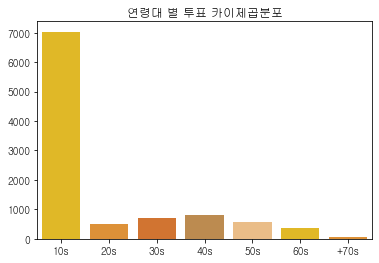

In [59]:
colors=['#FFCA08','#F8931D','#EC7016','#CE8D3E','#FBBE77']
age = ['10s','20s','30s','40s','50s','60s','+70s']


범주형 - 범주형 분석에서 카이제곱분포 = 독립성 검정
10대가 투표와 가장 독립적
70대가 투표와 가장 관계있음

연령대 별 투표 비율과 반비례 관계?
-> 20,30대와 투표의 관계가 40대 보다 깊다
-> 연령대 별 투표 비율과 반대되는 상황

-> 10대의 투표 여부 예측은 정확하지 않을 가능성이 크다

-> 60,70대의 투표 여부 예측은 정확할 가능성이 높다
-> 연령은 투표 예측에 도움이 되는 변수이다 (10대 제외)

In [ ]:
연령대만 보면 카이제곱 맞음
연령대 안으로 들어가서 투표여부를 보기에는 범주형인지 잘 모르겠다
각 연령대의 투표 여부는 수치형 변수로 봐도 될듯?!?

10대가 투표에 독립적이다 -> 가설 오류
투표 여부 건수 별로 t-test

연령대가 투표 여부에 독립적이다 (0)
10대가 투표여부에 독립적이다 (x) -> t-test
이론 공부!

독립성 여부와 가설 관계!
t- test!
